### First Neural Network - For handwritten Digit classification

In [1]:
! /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install tensorflow


  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.4/200.4 MB 521.6 kB/s eta 0:00:0000:0100:12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 698.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 575.3 kB/s eta 0:00:00a 0:00:01
Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━

In [88]:
# import dataset 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
x,y = mnist["data"],mnist["target"]


In [89]:
X_train = x.iloc[:60000]
f = X_train
X_test = x.iloc[60000:]
Y_train = y.iloc[:60000].astype(int)
Y_test = y.iloc[60000:].astype(int)

In [90]:
#scaling the features
X_train = X_train/255


In [91]:
import tensorflow as tf
from tensorflow import keras


In [92]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])


model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

    )



/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.fit(X_train,Y_train,epochs=10)



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - accuracy: 0.8771 - loss: 0.4715
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.9151 - loss: 0.3041
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - accuracy: 0.9209 - loss: 0.2837
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.9240 - loss: 0.2732
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step - accuracy: 0.9255 - loss: 0.2665
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - accuracy: 0.9279 - loss: 0.2617
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.9285 - loss: 0.2581
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.9292 - loss: 0.2554
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.9295 - loss: 0.2532
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 423us/step - accuracy: 0.9309 - loss: 0.2510


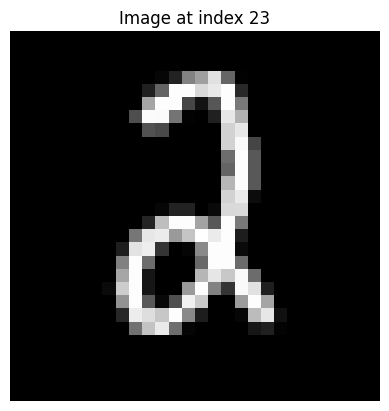

In [94]:
import matplotlib.pyplot as plt

img = X_test.iloc[2112].values.reshape(28, 28)

plt.imshow(img, cmap='gray')
plt.title("Image at index 23")
plt.axis('off')
plt.show()

In [95]:
#prediction on test dataset
s = X_test.iloc[2112].values.reshape(1, 784)
prediction = model.predict(s)
prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.5945576e-34, 0.0000000e+00,
        7.4921203e-10, 0.0000000e+00]], dtype=float32)

In [96]:
import numpy as np

predicted_class = np.argmax(prediction)
print(predicted_class)

2


In [97]:
# Adding Hidden Layers into the model

optimised_model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


optimised_model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

    )



/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
optimised_model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 710us/step - accuracy: 0.9221 - loss: 0.2723
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.9627 - loss: 0.1261
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.9737 - loss: 0.0884
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.9795 - loss: 0.0669
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.9834 - loss: 0.0532


In [ ]:
# Adding More Hidden Layers into the model

optimised_model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


optimised_model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

    )

